In [0]:
!wget http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-trainingSet.zip

--2018-04-15 07:48:41--  http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-trainingSet.zip
Resolving www.iapr-tc11.org (www.iapr-tc11.org)... 157.16.221.56
Connecting to www.iapr-tc11.org (www.iapr-tc11.org)|157.16.221.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245154271 (234M) [application/zip]
Saving to: ‘sigComp2011-trainingSet.zip’

sigComp2011-trainin 100%[===================>] 233.80M  8.55MB/s    in 31s     

2018-04-15 07:49:12 (7.53 MB/s) - ‘sigComp2011-trainingSet.zip’ saved [245154271/245154271]



In [1]:
!wget http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-test.zip

--2018-05-08 15:57:16--  http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-test.zip
Resolving www.iapr-tc11.org (www.iapr-tc11.org)... 157.16.221.56
Connecting to www.iapr-tc11.org (www.iapr-tc11.org)|157.16.221.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566029024 (540M) [application/zip]
Saving to: ‘sigComp2011-test.zip’

sigComp2011-test.zi  62%[===========>        ] 336.54M  7.69MB/s    eta 27s    

sigComp2011-test.zi 100%[===================>] 539.81M  8.26MB/s    in 70s     

2018-05-08 15:58:26 (7.76 MB/s) - ‘sigComp2011-test.zip’ saved [566029024/566029024]



In [1]:
import os
os.chdir('drive')

OSError: ignored

In [3]:
!ls

datalab


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('sigComp2011-test.zip', 'r')
zip_ref.extractall('drive',pwd='I hereby accept the SigComp 2011 disclaimer.')
zip_ref.close()

In [0]:
import numpy as np
from PIL import Image
import pickle
import os
import pickle

In [0]:
import cv2

In [0]:
def Center(img, new_height, new_width):
    cImg = 255*np.ones((new_height,new_width,1))
    width =  np.size(img,1)
    height = np.size(img,0)

    left = int((new_width - width)/2.)
    top = int(((new_height - height)/2.))
    right = int(((width + new_width)/2.))
    bottom = int(((height + new_height)/2.))
    cImg[top:bottom, left:right,:] = img
    return cImg

In [0]:
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key=str.lower)


In [8]:
x = []
y = []

j = k = 1
arr = []
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key=str.lower)

for i in range(len(path)):
    if(path[i][2] == str(j)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k + 1
    elif(j<10):
        j = j + 1
        print('j='+str(j))
    else:
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k+1
print('k='+str(k))        

j=2
j=3
j=4
j=5
j=6
j=7
j=8
j=9
j=10
k=227


In [9]:
x[100].shape

(551, 1117, 3)

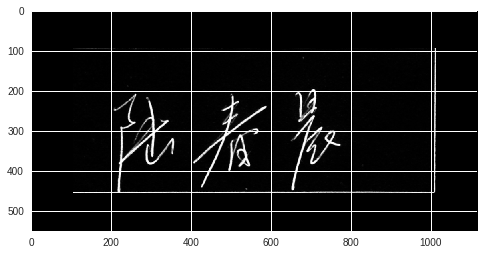

In [0]:
from matplotlib import pyplot as plt
plt.imshow(np.uint8(x[0]))
plt.show()

In [0]:
import h5py


In [0]:
hf = h5py.File('data_1.h5', 'w')
hf.create_dataset('dataset_1', data=x)
hf.create_dataset('dataset_2', data=y)
hf.close()

In [12]:
!ls

data_1.h5  data.h5  model.ipynb  mycode.ipynb  trainingSet  trial.ipynb


In [11]:
!cp -r Testdata_SigComp2011 SOP/

cp: error reading 'Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/016/09_0113016.PNG': Input/output error
cp: error reading 'Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/016/04_016.png': Input/output error
cp: error reading 'Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/011/09_0100011.PNG': Input/output error
cp: error reading 'Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/018/07_0115018.PNG': Input/output error
cp: error reading 'Testdata_SigComp2011/SigComp11-Offlinetestset/Chinese/Questioned(487)/020/03_020.png': Input/output error
^C


In [0]:
x[0].shape

(551, 1117)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
os.chdir('drive/SOP')

In [17]:
!ls

100epochs_3channel.h5  data_s_gen.h5		  Testdata_SigComp2011
data_1.h5	       data_siamese_forge.pickle  trainingSet
data.h5		       data_siamese_gen.pickle	  tranfer_20ep_l2+dropout.h5
data_s_forge1	       data_siamese.h5		  tranfer_20ep_l2reg.h5
data_s_forge1.h5       data_siamese.pickle	  tranfer_20ep_overfit.h5
data_s_gen1	       model.ipynb		  trial.ipynb
data_s_gen1.h5	       mycode.ipynb


In [0]:
list.sort?

In [18]:
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries/')
path.sort(key = str.lower)
path

['0100003_1.png',
 '0100003_10.png',
 '0100003_11.png',
 '0100003_12.png',
 '0100003_2.png',
 '0100003_3.png',
 '0100003_4.png',
 '0100003_5.png',
 '0100003_6.png',
 '0100003_7.png',
 '0100003_8.png',
 '0100003_9.png',
 '0101004_1.png',
 '0101004_10.png',
 '0101004_11.png',
 '0101004_12.png',
 '0101004_2.png',
 '0101004_3.png',
 '0101004_4.png',
 '0101004_5.png',
 '0101004_6.png',
 '0101004_7.png',
 '0101004_8.png',
 '0101004_9.png',
 '0103002_1.png',
 '0103002_10.png',
 '0103002_11.png',
 '0103002_12.png',
 '0103002_13.png',
 '0103002_2.png',
 '0103002_3.png',
 '0103002_4.png',
 '0103002_6.png',
 '0103002_7.png',
 '0103002_8.png',
 '0103002_9.png',
 '0104006_1.png',
 '0104006_11.png',
 '0104006_12.png',
 '0104006_2.png',
 '0104006_3.png',
 '0104006_4.png',
 '0104006_5.png',
 '0104006_6.png',
 '0104006_7.png',
 '0104006_8.png',
 '0104006_9.png',
 '0108008_1.png',
 '0108008_10.png',
 '0108008_11.png',
 '0108008_12.png',
 '0108008_2.png',
 '0108008_3.png',
 '0108008_4.png',
 '0108008_5.p

In [20]:
path[0][4:7]

'003'

In [18]:
x = []

a = b = 0 
path = os.listdir('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries/')
path.sort(key = str.lower)

for i in range(10):
  y = []
  for j in range(b,len(path)):
    if(path[j][3:6] == str(i+1).zfill(2)):
        img = cv2.imread('trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries/'+path[j]+'')
        img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        arr = np.asarray(img)
        arr = Center(arr,551,1117)
        y.append(arr)
        a = a + 1
        print(a)
        if(a==235):
          x.append(y)
    else:
      print('...............')
      x.append(y)
      b = a
      break

...............
...............
...............
...............
...............
...............
...............
...............
...............
...............


In [0]:
x = np.asarray(x)

In [20]:
x.shape

(10, 0)

In [0]:
hf.close()

In [0]:
hf = h5py.File('data_s_forge1.h5', 'w')
hf.create_dataset('dataset_1', data=x)
hf.close()

In [82]:
c = 0
for d in range(10):
   print(len(x[d]))
   c= c + len(x[d])
print(c)    

24
24
24
24
21
22
24
24
24
0


IndexError: ignored

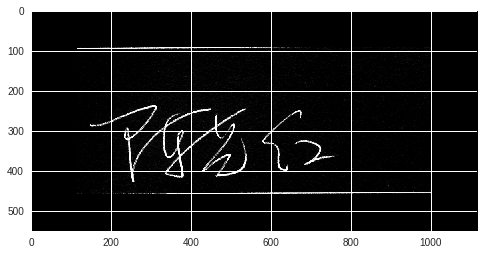

In [25]:
from matplotlib import pyplot as plt
plt.imshow(np.uint8(x[1][0]))
plt.show()